In [171]:
import cv2
import skimage

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal
from scipy import ndimage
import time


In [172]:
%matplotlib inline
import matplotlib.pyplot as plt

In [173]:
im1_file = './data_hires/01861a.tif'

img = cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE)
img = img[5: -5, 5: -5]
shape = img.shape
div = shape[0]//3
print(div)
print(shape)
window_len = 20

# print(img.shape)
im1 = np.array(img[150 : div, 100:-100])
im2 = np.array(img[div+50 : 2*div-100, 50 : -150])
im3 = np.array(img[2*div: 3*div-150, 20 : -180])

# # plt.imshow(img)
# # plt.savefig("img.png")
# plt.imshow(im1)
# plt.savefig("img1.png")
# plt.imshow(im2)
# plt.savefig("img2.png")
# plt.imshow(im3)
# plt.savefig("img3.png")

# #pre_processing
# im1 = cv2.Laplacian(cv2.GaussianBlur(im1, (3,3), 0), cv2.CV_16S)

# im2 = cv2.Laplacian(cv2.GaussianBlur(im2, (3,3), 0), cv2.CV_16S)

# # # im3 = cv2.Laplacian(cv2.GaussianBlur(im3, (3,3), 0), cv2.CV_16S)

im1 =  ndimage.gaussian_laplace(im1, sigma=2)

im2 =  ndimage.gaussian_laplace(im2, sigma=2)

im3 =  ndimage.gaussian_laplace(im3, sigma=2)



# # h x w x 3. np.uint np.stack
# print(im1.shape) 

3225
(9676, 3731)


Part 1: Fourier-based color channel alignment

9.047353744506836
32 13
7 17
(3075, 3531) (3075, 3531) (3075, 3531)


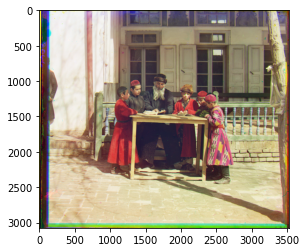

In [174]:


start_time = time.time()

#fft
fft_img1 = np.fft.fftshift(np.fft.fft2(im1))
fft_img2 = np.fft.fftshift(np.fft.fft2(im2))
fft_img3 = np.fft.fftshift(np.fft.fft2(im3))
shape_c = fft_img1.shape

#conjugate
conj_2 = np.conjugate(fft_img2)
conj_3 = np.conjugate(fft_img3)

#product
prod_1_2 = fft_img1 * conj_2
prod_1_3 = fft_img1 * conj_3

#inverse
inv_1_2 = np.abs(np.fft.ifft2(prod_1_2))
inv_1_3 = np.abs(np.fft.ifft2(prod_1_3))



# skimage.io.imsave("1_2_9.jpeg", inv_1_2)

# skimage.io.imsave("1_3_9.jpeg", inv_1_3)
#offset 
x1, y1 = np.unravel_index(np.argmax(inv_1_2, axis=None), inv_1_2.shape)
x2, y2 = np.unravel_index(np.argmax(inv_1_3, axis=None), inv_1_3.shape)
end_time = time.time()
total_time = end_time - start_time
print(total_time)

x1 = min(x1, shape_c[0] - x1)
x2 = min(x2, shape_c[0] - x2)
y1 = min(shape_c[1] - y1, y1)

y2 = min(shape_c[1] - y2, y2)

print(x1, y1)
print(x2, y2)

channel1 = img[150: div, 100:-100]

channel2 = img[div + x1 + 50: 2*div-100 + x1, y1+50 : shape_c[1] +50+ y1]

channel3 = img[2*div + x2 : 3*div-150 + x2, y2+20 : shape_c[1]+20 + y2]

print(channel1.shape, channel2.shape, channel3.shape)
res = np.dstack((channel3, channel2, channel1))

plt.imshow(res)
plt.savefig("part1.jpg")
skimage.io.imsave("9.jpeg", res)








part2: Scale-space blob detection